In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [146]:
from pathlib import Path

import numpy as np
 
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors

from matplotlib import rcParams

import themepy
theme = themepy.Theme('paper')

rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200



import diagram as dg
import colorhelp as ch

spath = Path("../deck/figures")

# https://photos.app.goo.gl/fDbayhbHXsmJ8aoh9
build on math diagram figs:
1. fig w/ two dots
1. two rows
1. backward arrow
2. line plot
2. backward arrow?
3. two rows -> two dots
3. equivariance-> two dots moved
4. maybe an appendix fig on what happens in V for equiv (throw back to S & K)

In [131]:
dtwo= [[('temp', 61), ('prcp', 0.47), ('name', 'LGA')], 
        [('temp', 49), ('prcp', 0.74), ('name', 'JFK')]]

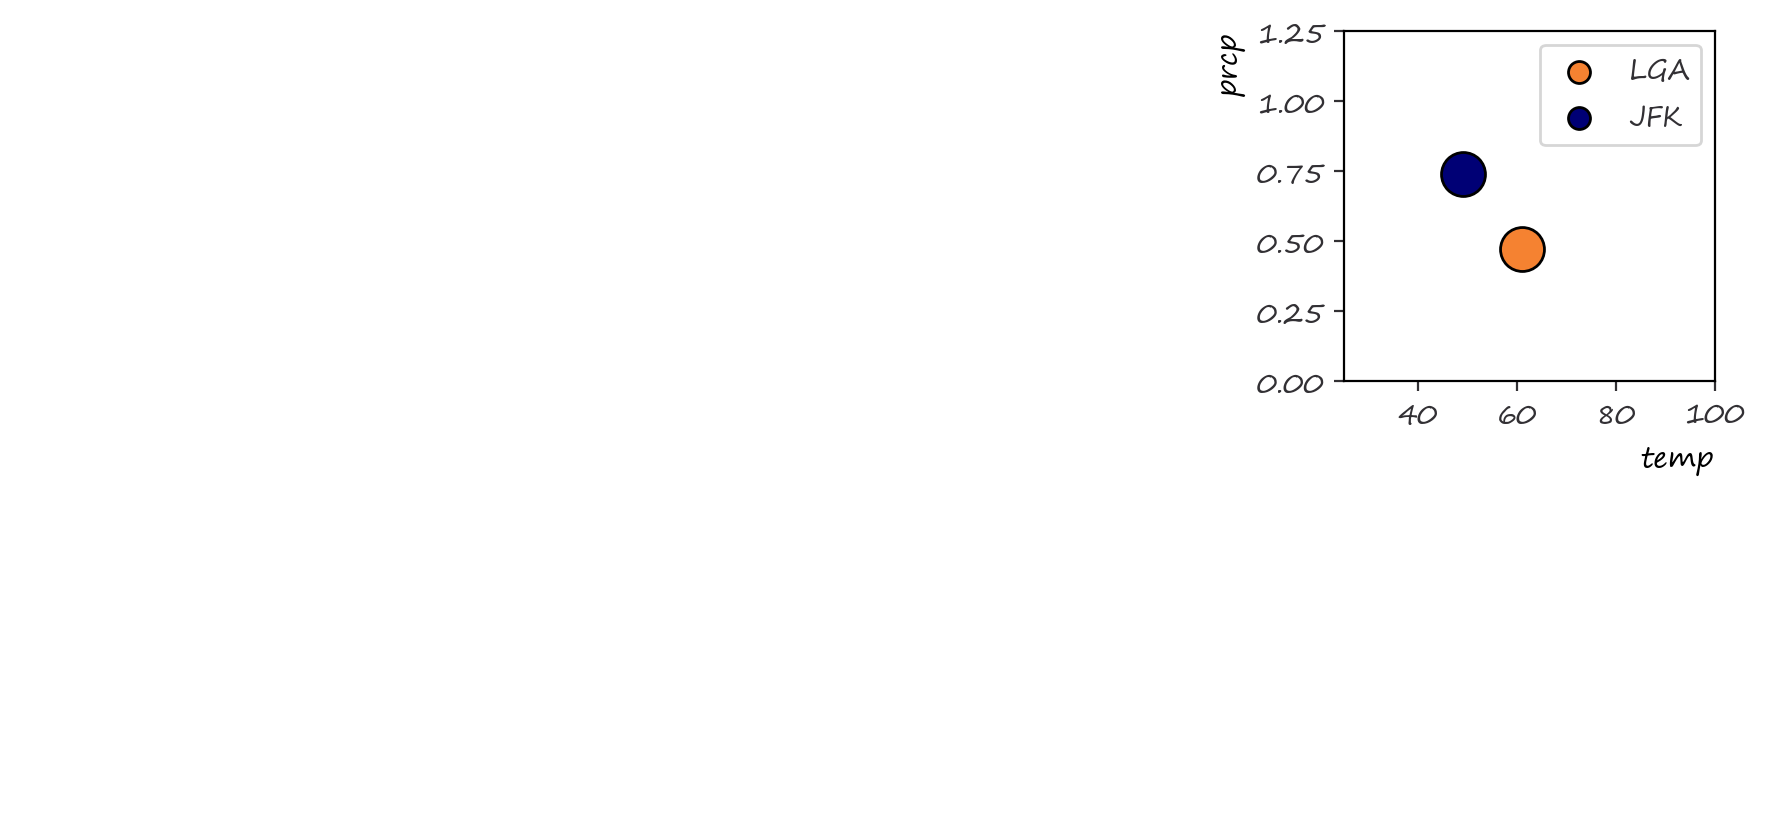

In [231]:
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', 
                          label=None)
fig.savefig(spath/"intro01.png", facecolor='white', bbox_inches='tight')


plt.show()

In [232]:
x = np.array(dtwo).T[1][0].astype(float)
y = np.array(dtwo).T[1][1].astype(float)
c = np.array(dtwo).T[1][2]

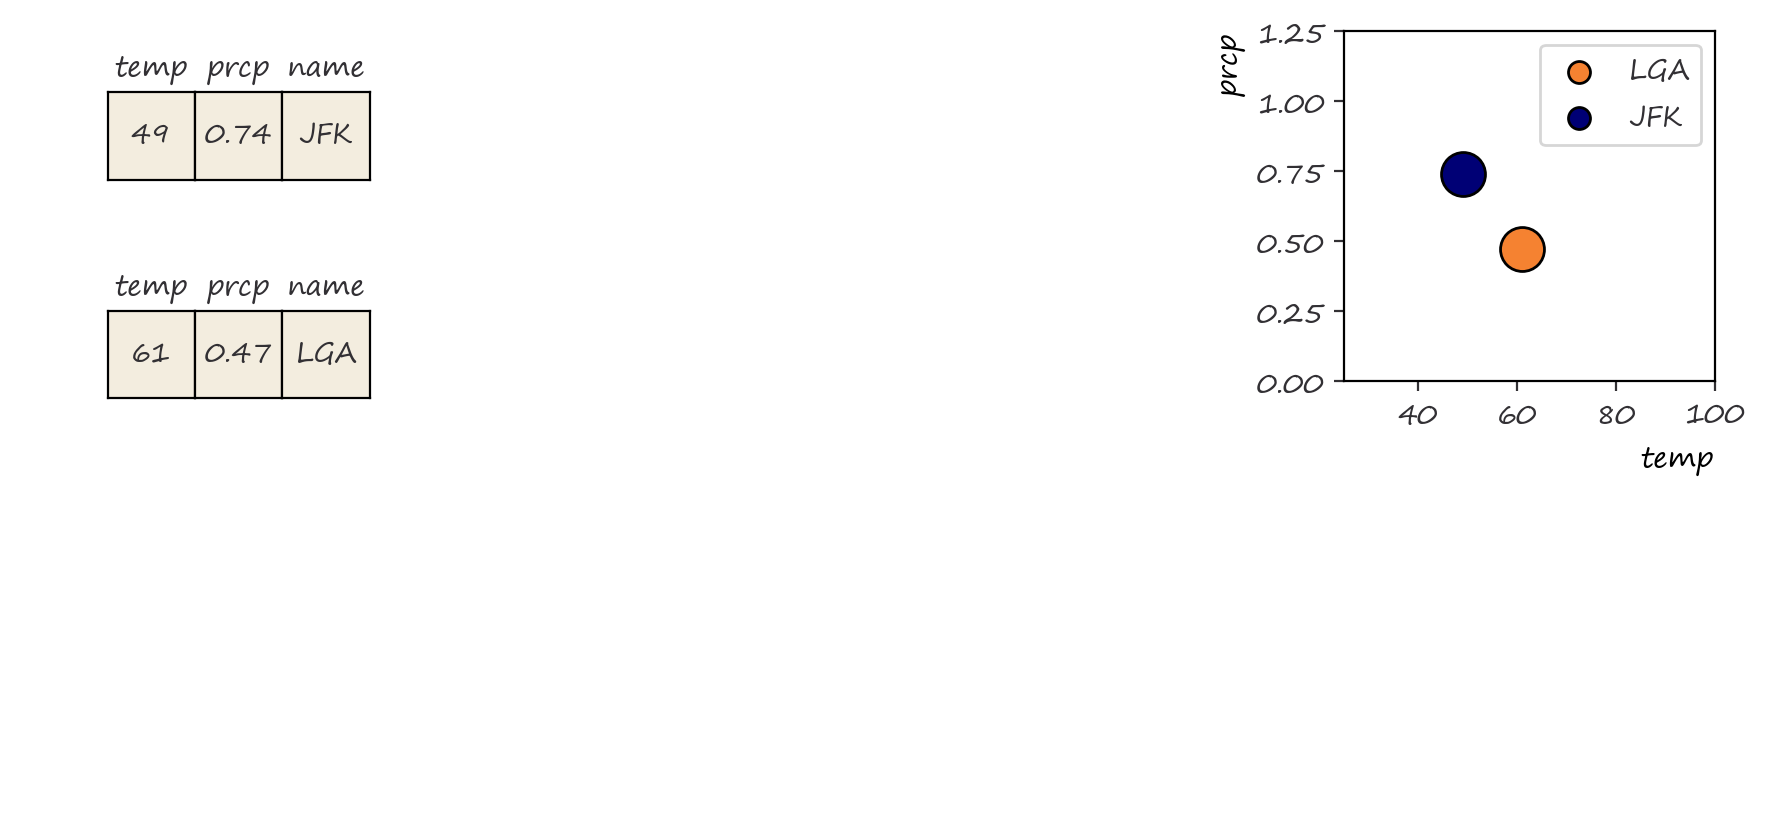

In [233]:
#add backwards arrows
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', label=None)
dg.table(axd, dtwo)
fig.savefig(spath/"intro02.png", facecolor='white', bbox_inches='tight')


plt.show()

In [234]:
N = 50
xv = np.linspace(x[0], x[1], N)
yv = np.linspace(y[0], y[1], N)
cv = np.linspace(0, 1, N)
points = np.array([xv, yv]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
cmap = ch.get_continuous_cmap([dg.station_color[c[1]], dg.station_color[c[0]]])
norm = mcolors.BoundaryNorm(cv, cmap.N)

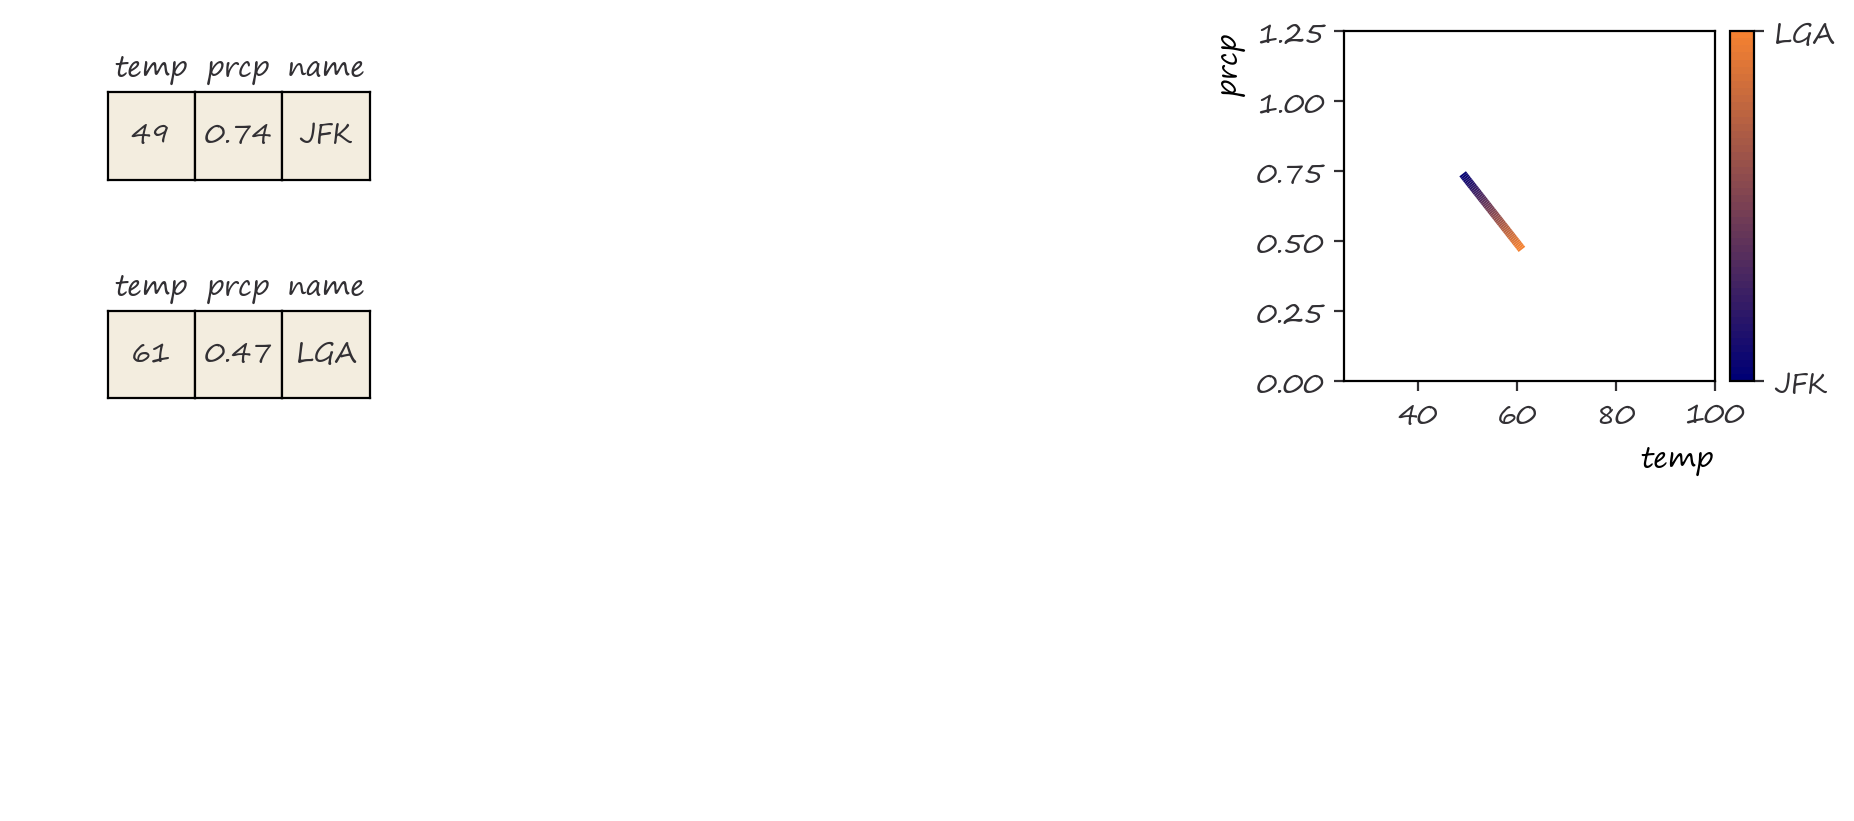

In [235]:
#same arrows as above + middle?
fig, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='line', label=None)
dg.table(axd, dtwo)


lc = mcoll.LineCollection(segments, lw=3, cmap=cmap, norm=norm)
lc.set_array(cv[::-1])
line = axd['H'].add_collection(lc)
cax = axd['H'].inset_axes([103, 0, 5, 1.25], 
                          transform=axd['H'].transData)
cb = fig.colorbar(line, cax=cax, ticks=[0,1])
cb.set_ticklabels(['JFK', 'LGA'])
fig.savefig(spath/"intro03.png", facecolor='white', bbox_inches='tight')


plt.show()

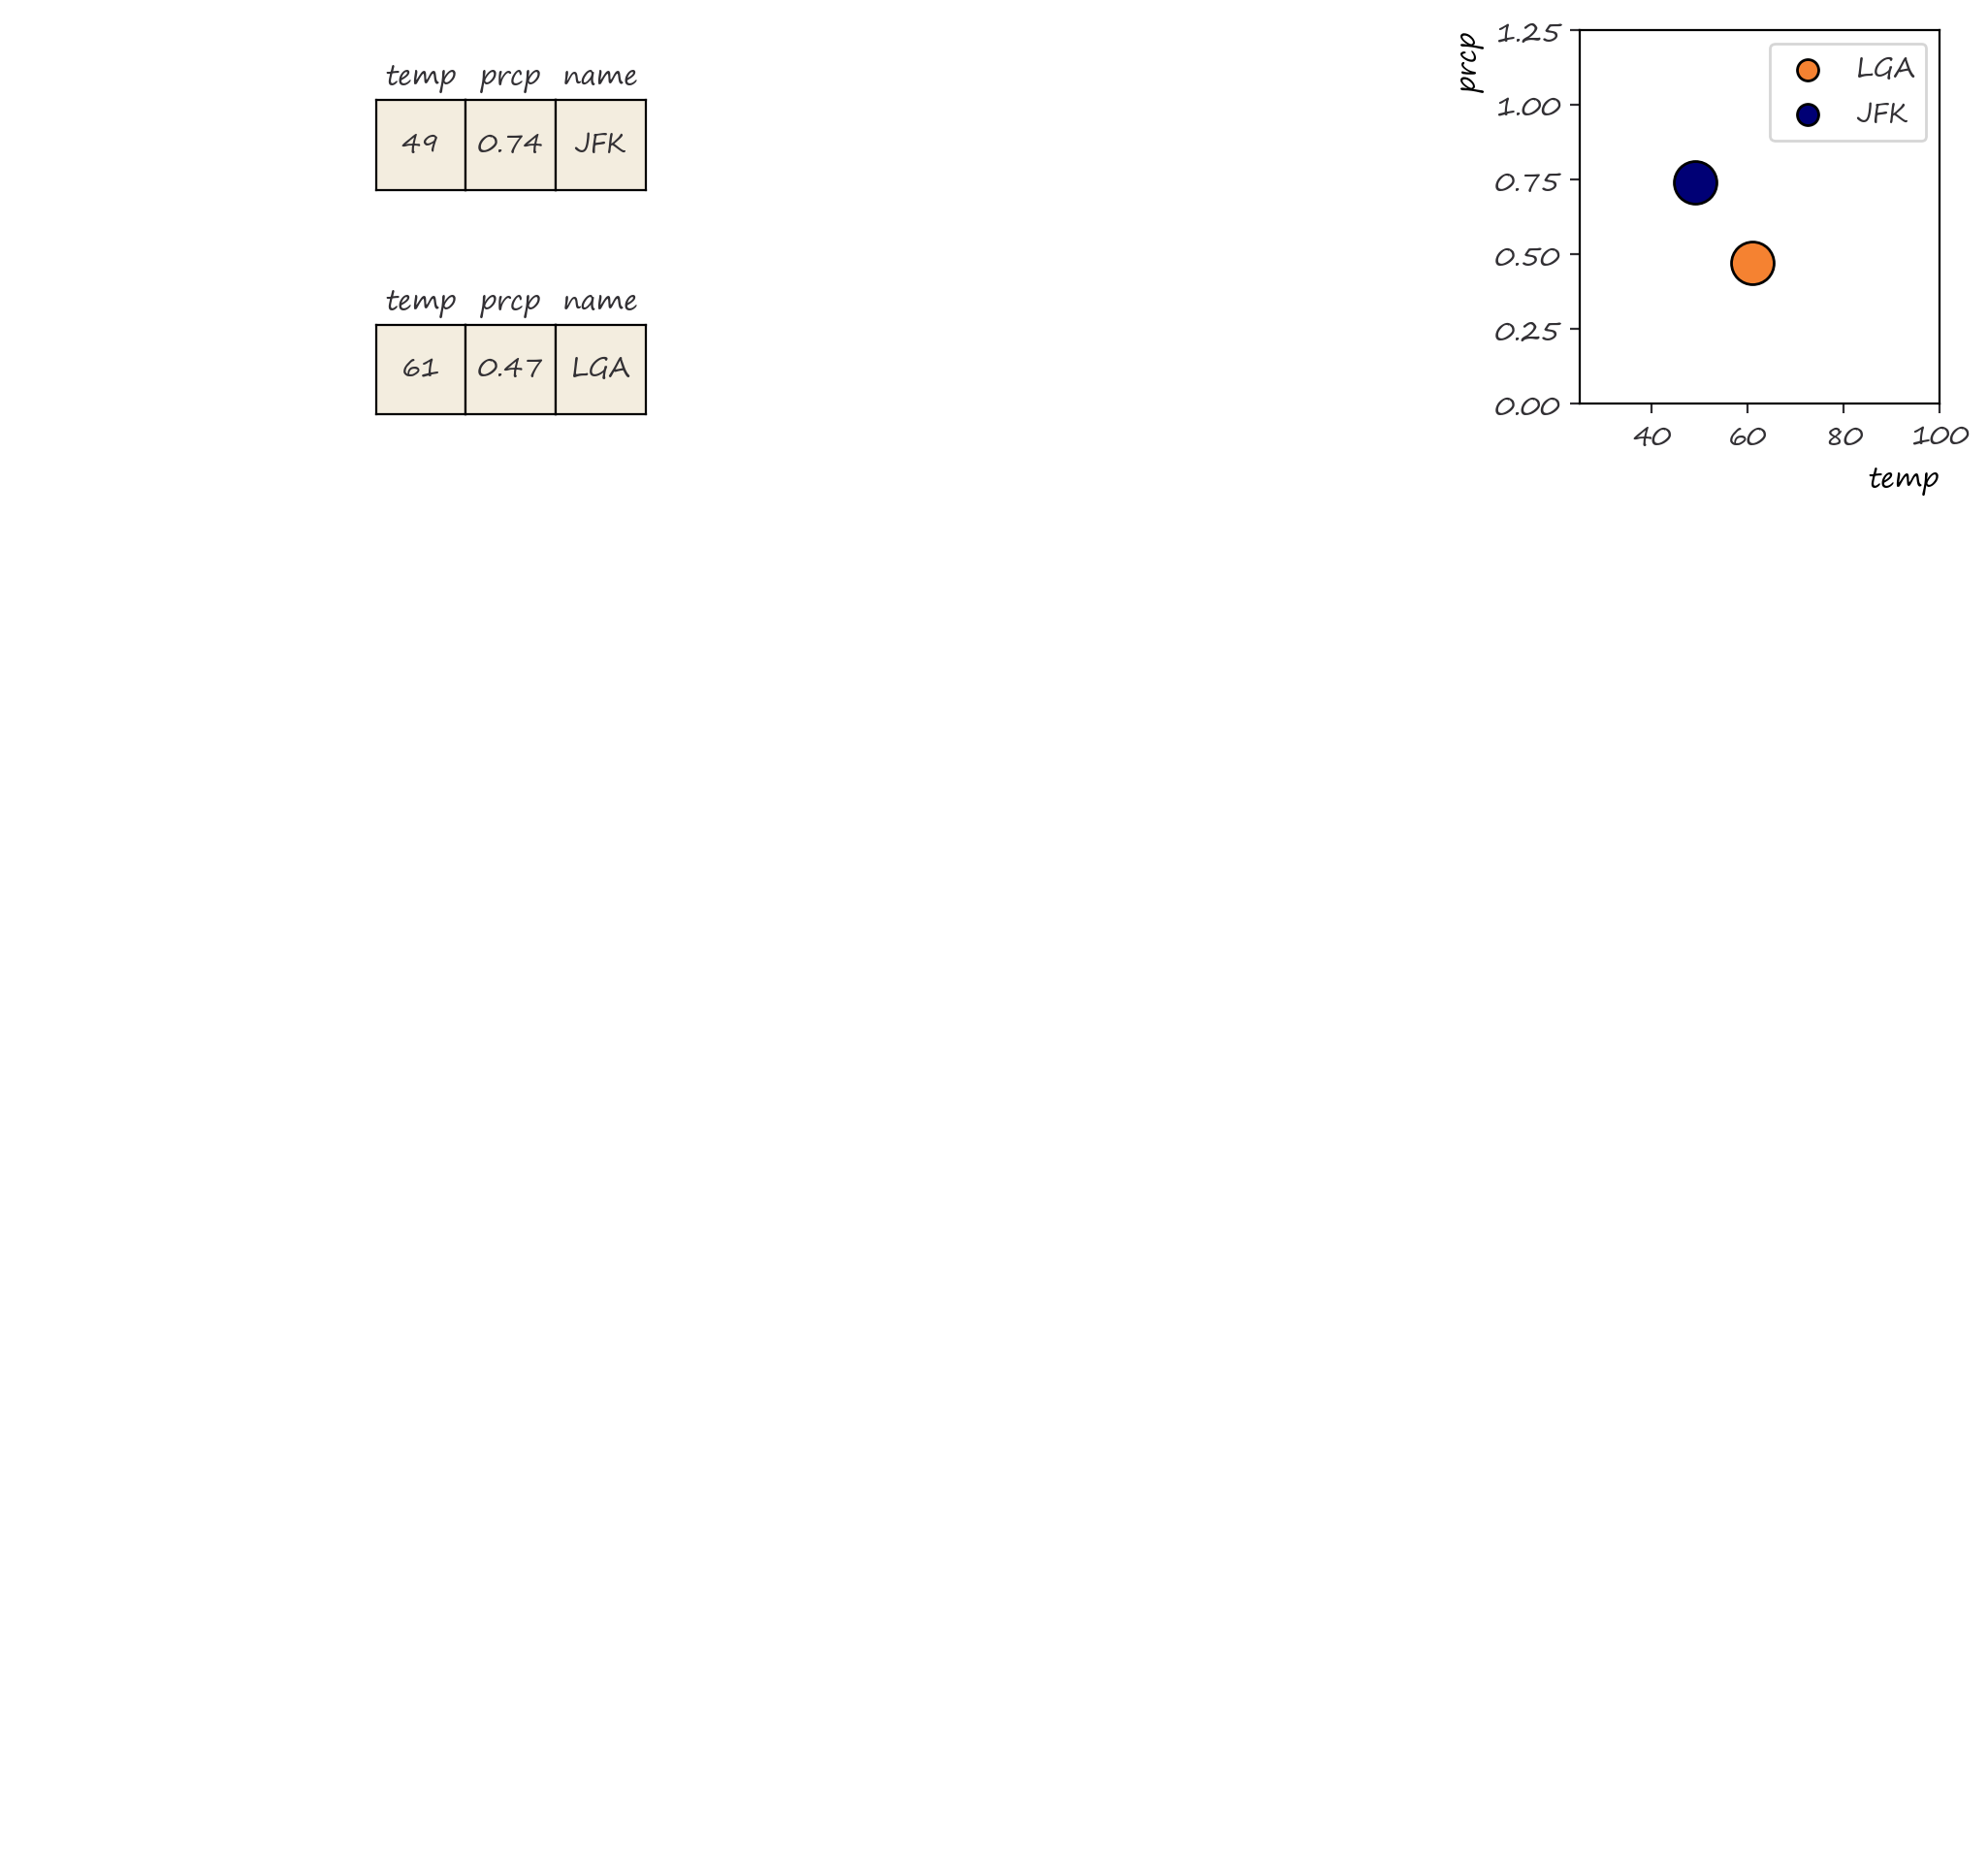

In [266]:
#add forwards arrows
fig = plt.figure(facecolor='white', figsize=(11,10))
fig0, fig1 = fig.subfigures(2, 1, facecolor='white')

fig0, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', fig=fig0, label=None)
dg.table(axd, dtwo)
fig0.subplots_adjust(hspace=0)
fig1.subplots_adjust(hspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(spath/"intro04.png", facecolor='white', bbox_inches='tight')

plt.show()

In [254]:
dthree = []
for row in dtwo:
    d = dict(row)
    d['temp'] = d['temp']+ 25
    dthree.append(list(d.items()))
dthree

[[('temp', 86), ('prcp', 0.47), ('name', 'LGA')],
 [('temp', 74), ('prcp', 0.74), ('name', 'JFK')]]

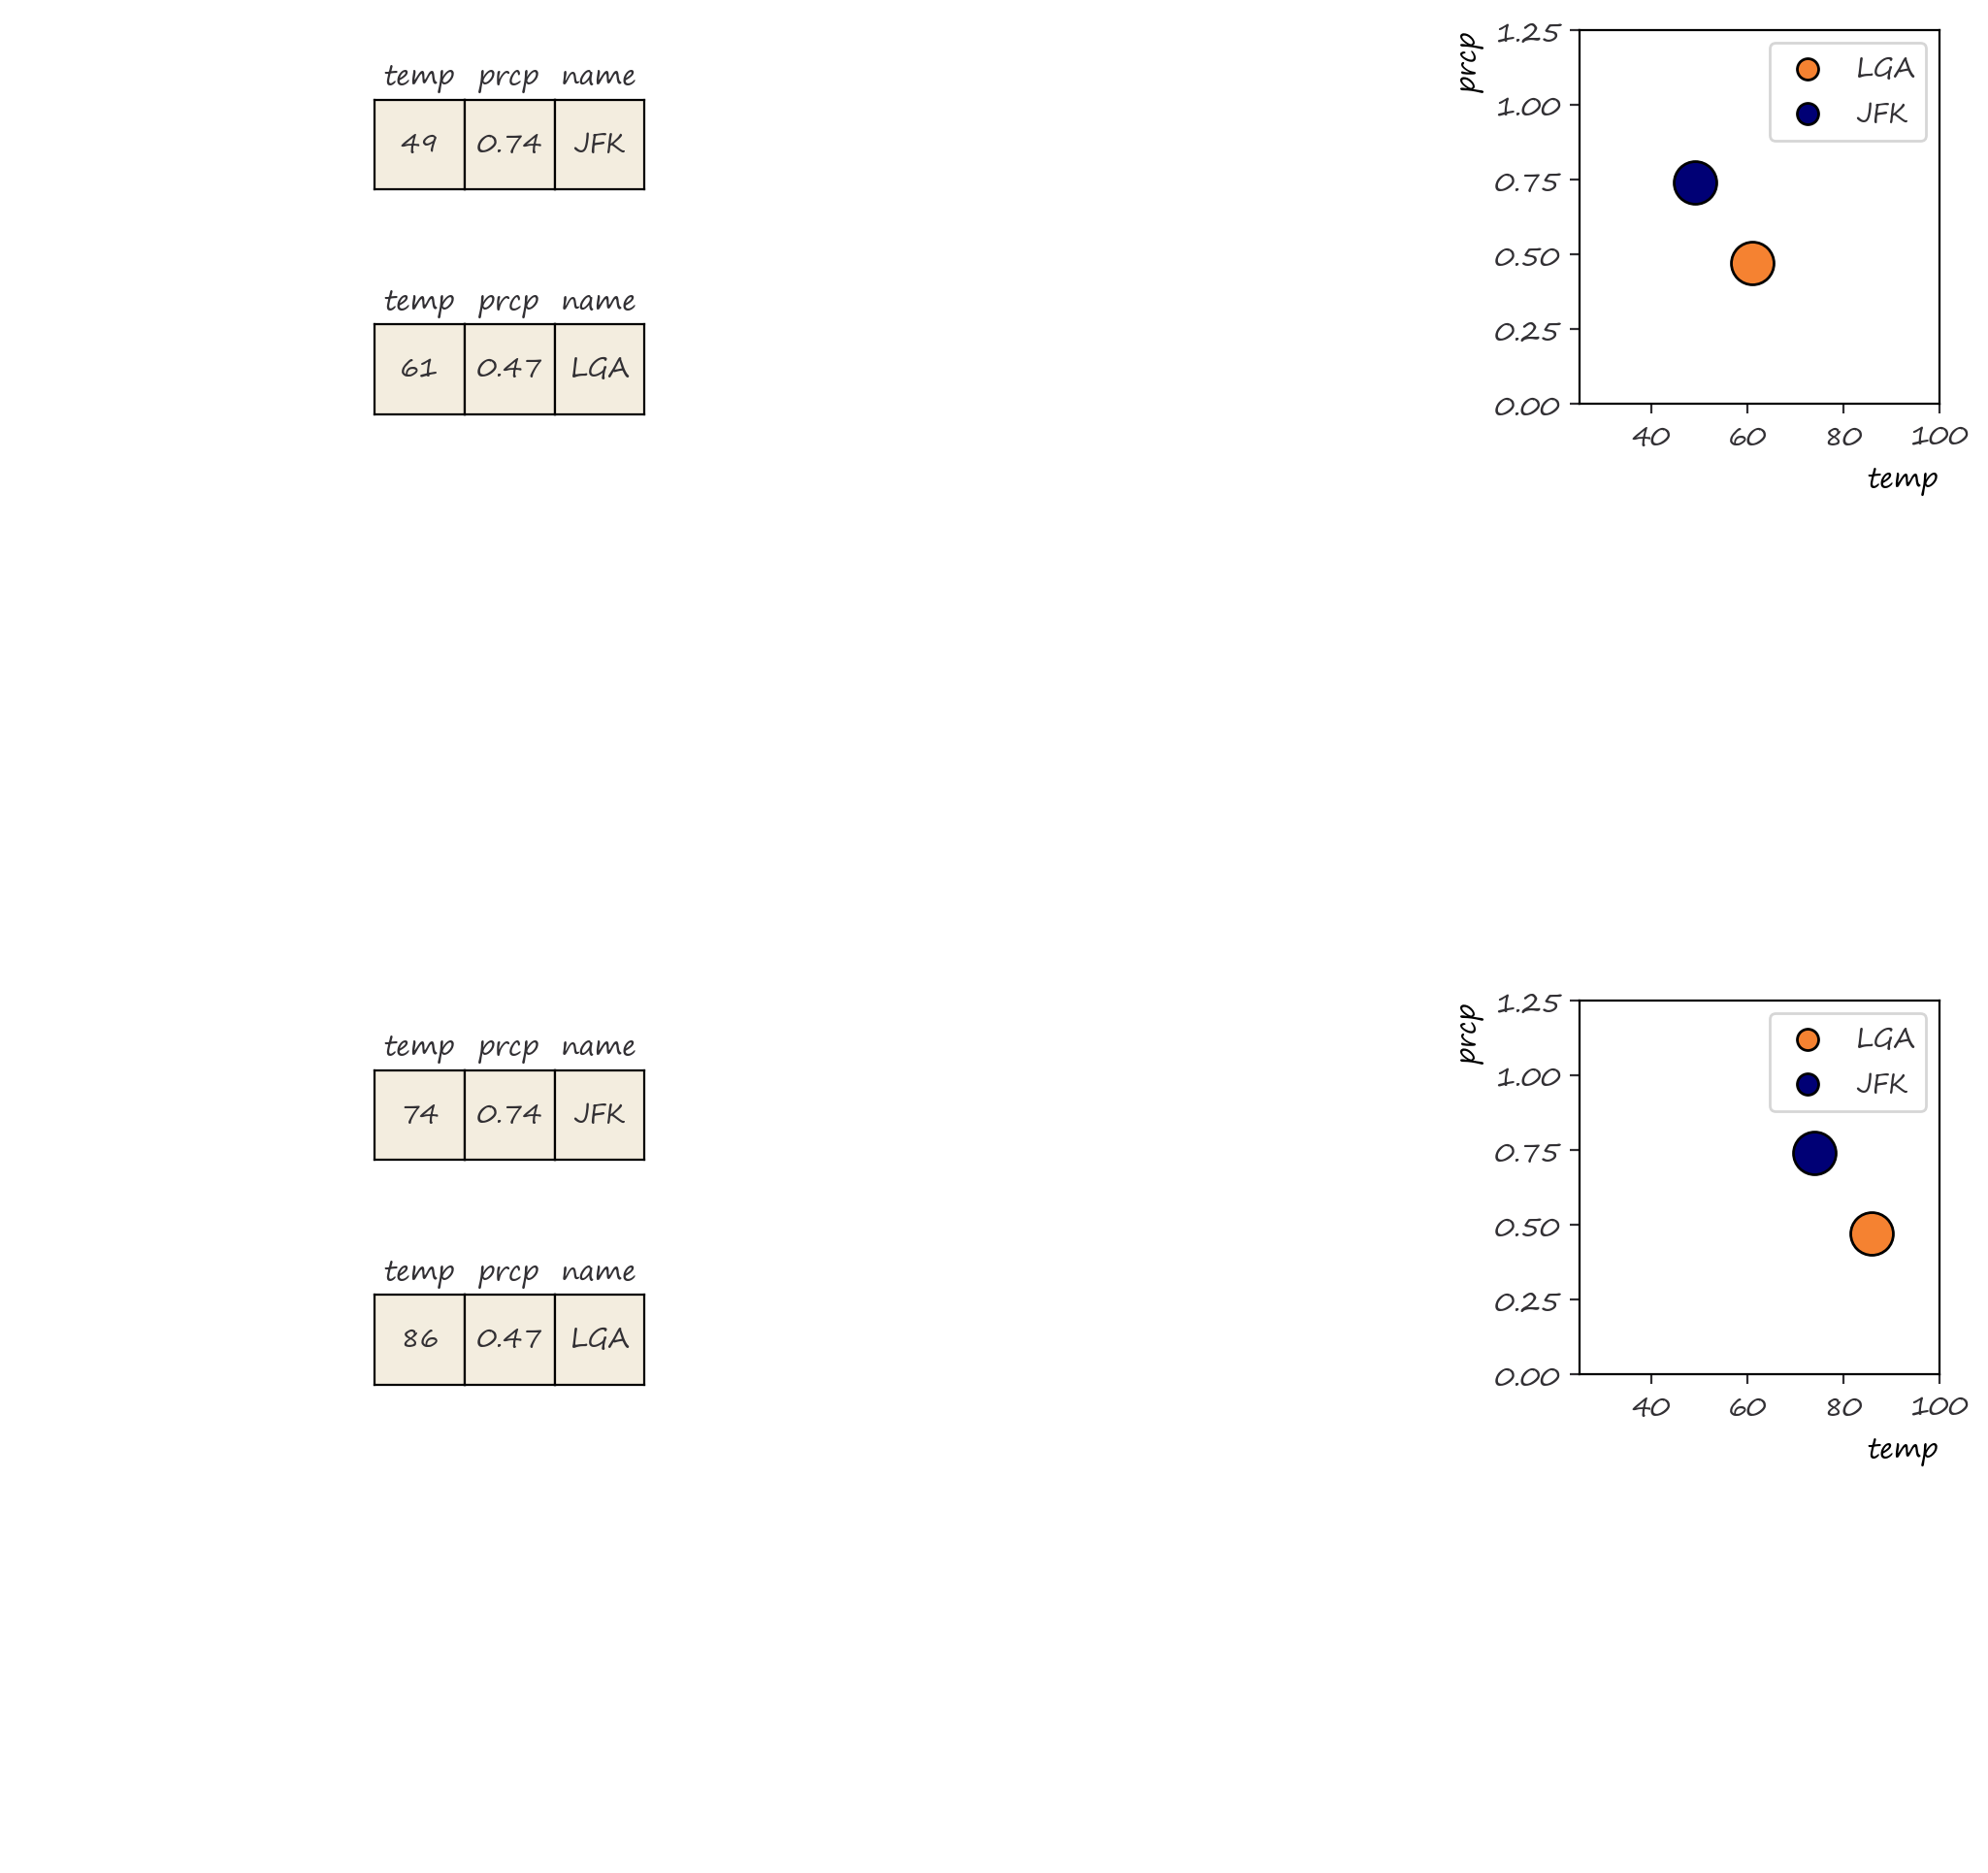

In [272]:
#add equivariance arrows
fig = plt.figure(facecolor='white', figsize=(11,10))
fig0, fig1 = fig.subfigures(2, 1, facecolor='white')

fig0, axd = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dtwo, 
                          plot_type='scatter', fig=fig0, label=None)
dg.table(axd, dtwo)

fig1, axd1 = dg.make_figure(artist=False, section=False,
                          visual=False, continuity=False, 
                          data=False, values=dthree, 
                          plot_type='scatter', fig=fig1, label=None)
dg.table(axd1, dthree)

fig0.subplots_adjust(hspace=0)
fig1.subplots_adjust(hspace=0)
fig.subplots_adjust(hspace=0)
fig.savefig(spath/"intro05.png", facecolor='white', bbox_inches='tight')


plt.show()

In [56]:
done = [dtwo[0]]

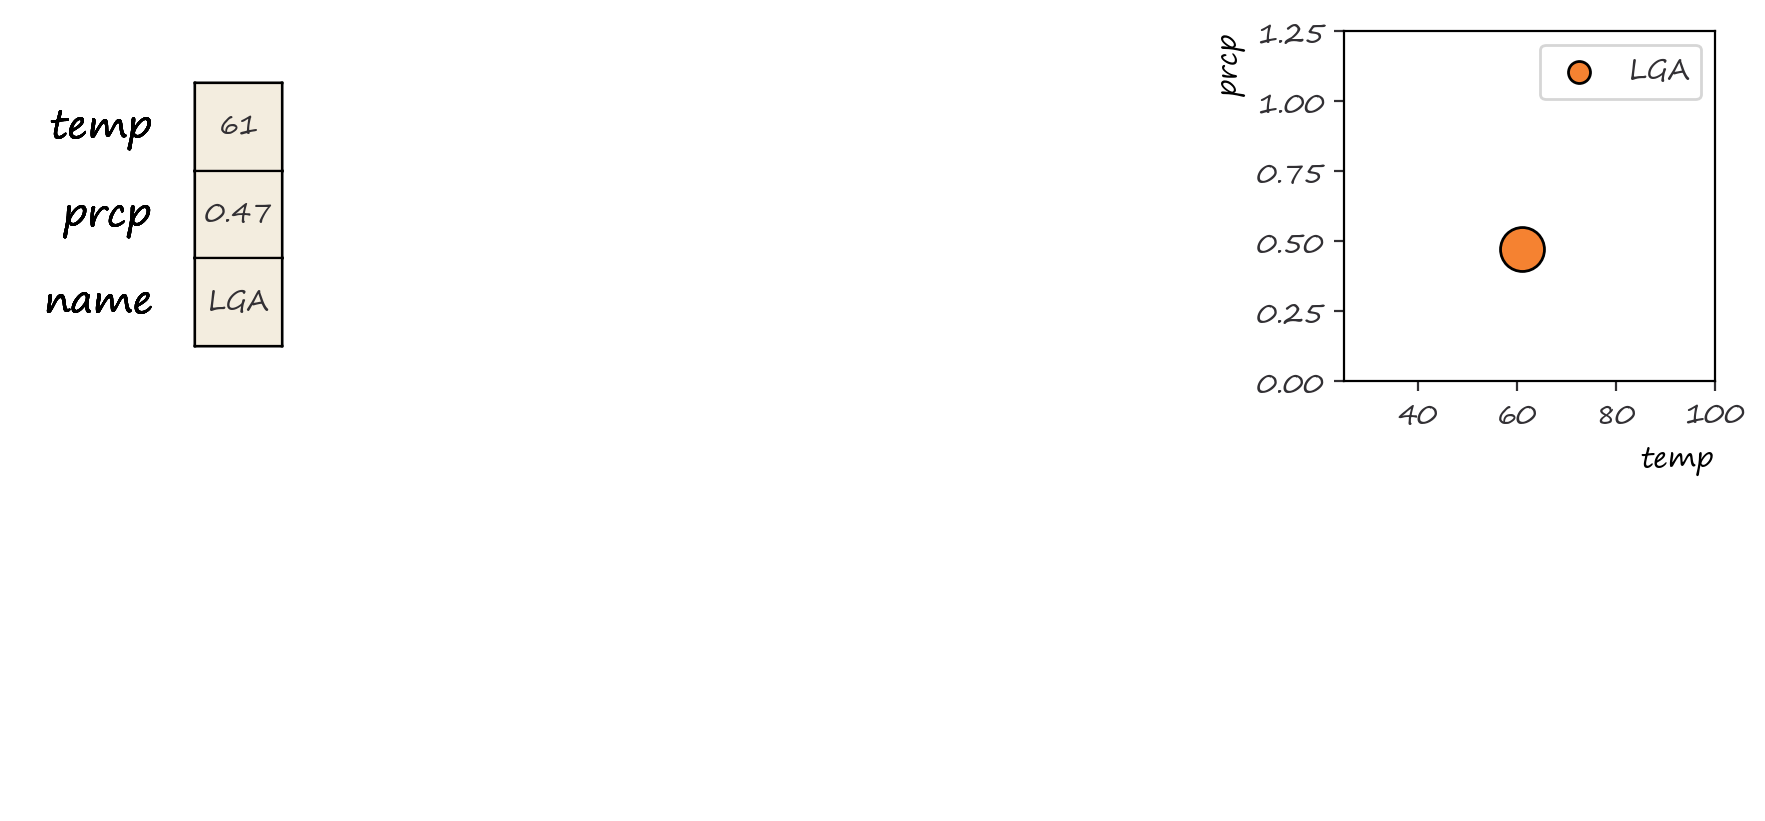

In [59]:
fig, axd = dg.make_figure(artist=False, section=False, 
                          visual=False, continuity=False, 
                          data=True, values=done, label=None)
fig.savefig(spath/"math01.png", facecolor='white', bbox_inches='tight')
plt.show()

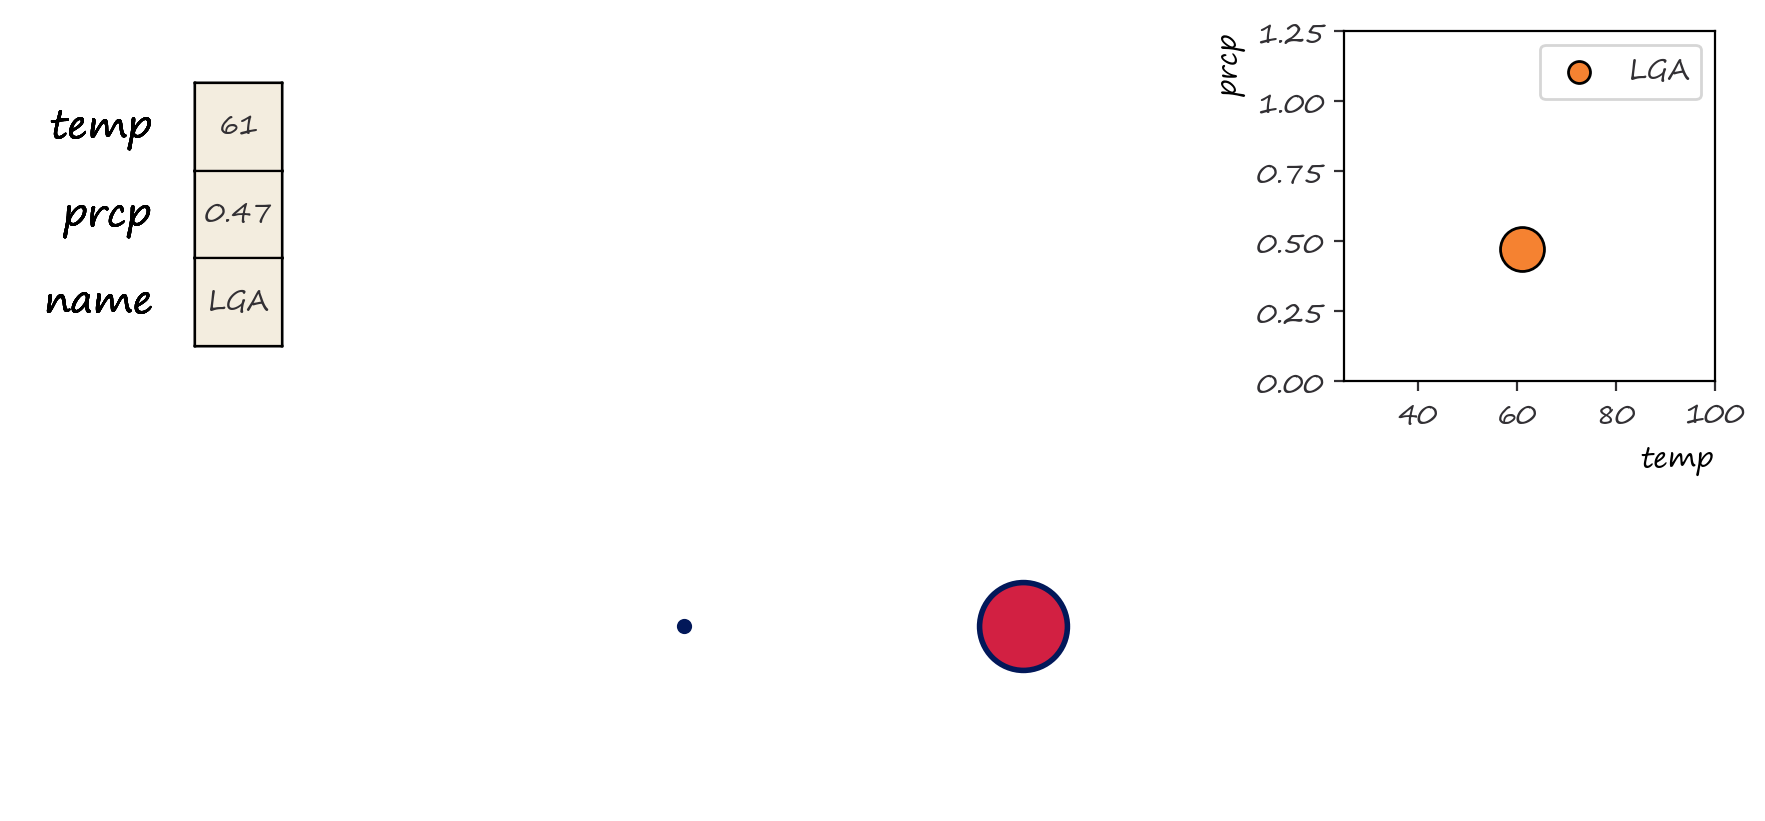

In [61]:
fig, axd = dg.make_figure(artist=False, section=False, 
                          visual=False, continuity=True, 
                          data=True, values=done, label=None)
fig.savefig(spath/"math02.png", facecolor='white', bbox_inches='tight')
plt.show()

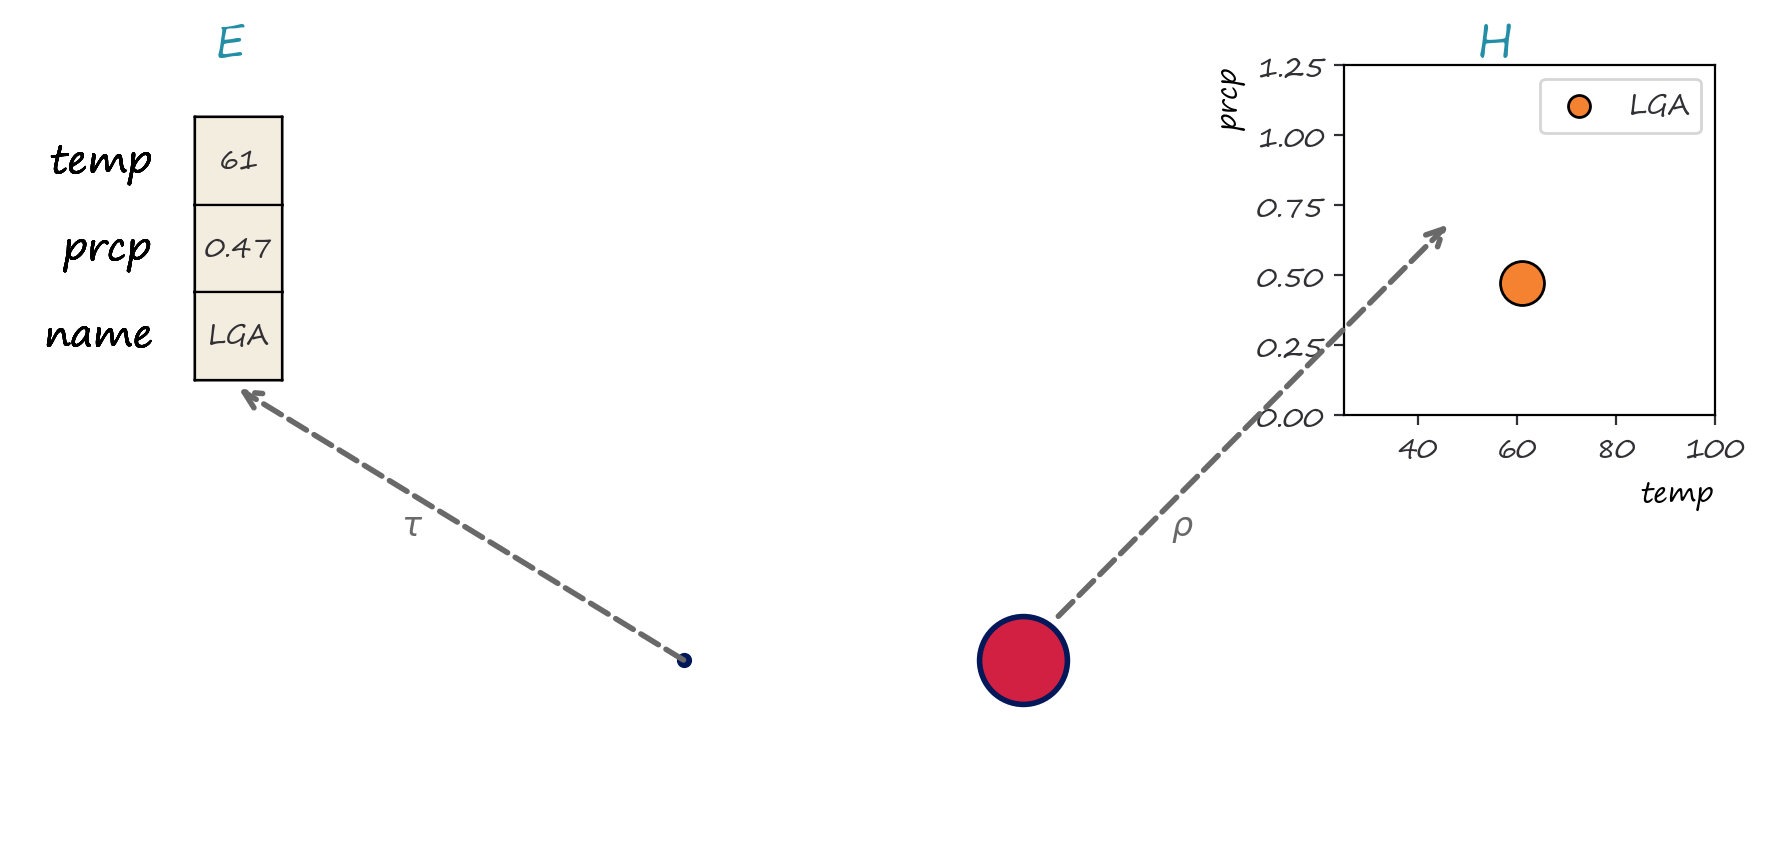

In [62]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=False, continuity=True,
                          data=True, values=done, 
                          label=['E', 'H'])
fig.savefig(spath/"math03.png", facecolor='white', bbox_inches='tight')
plt.show()

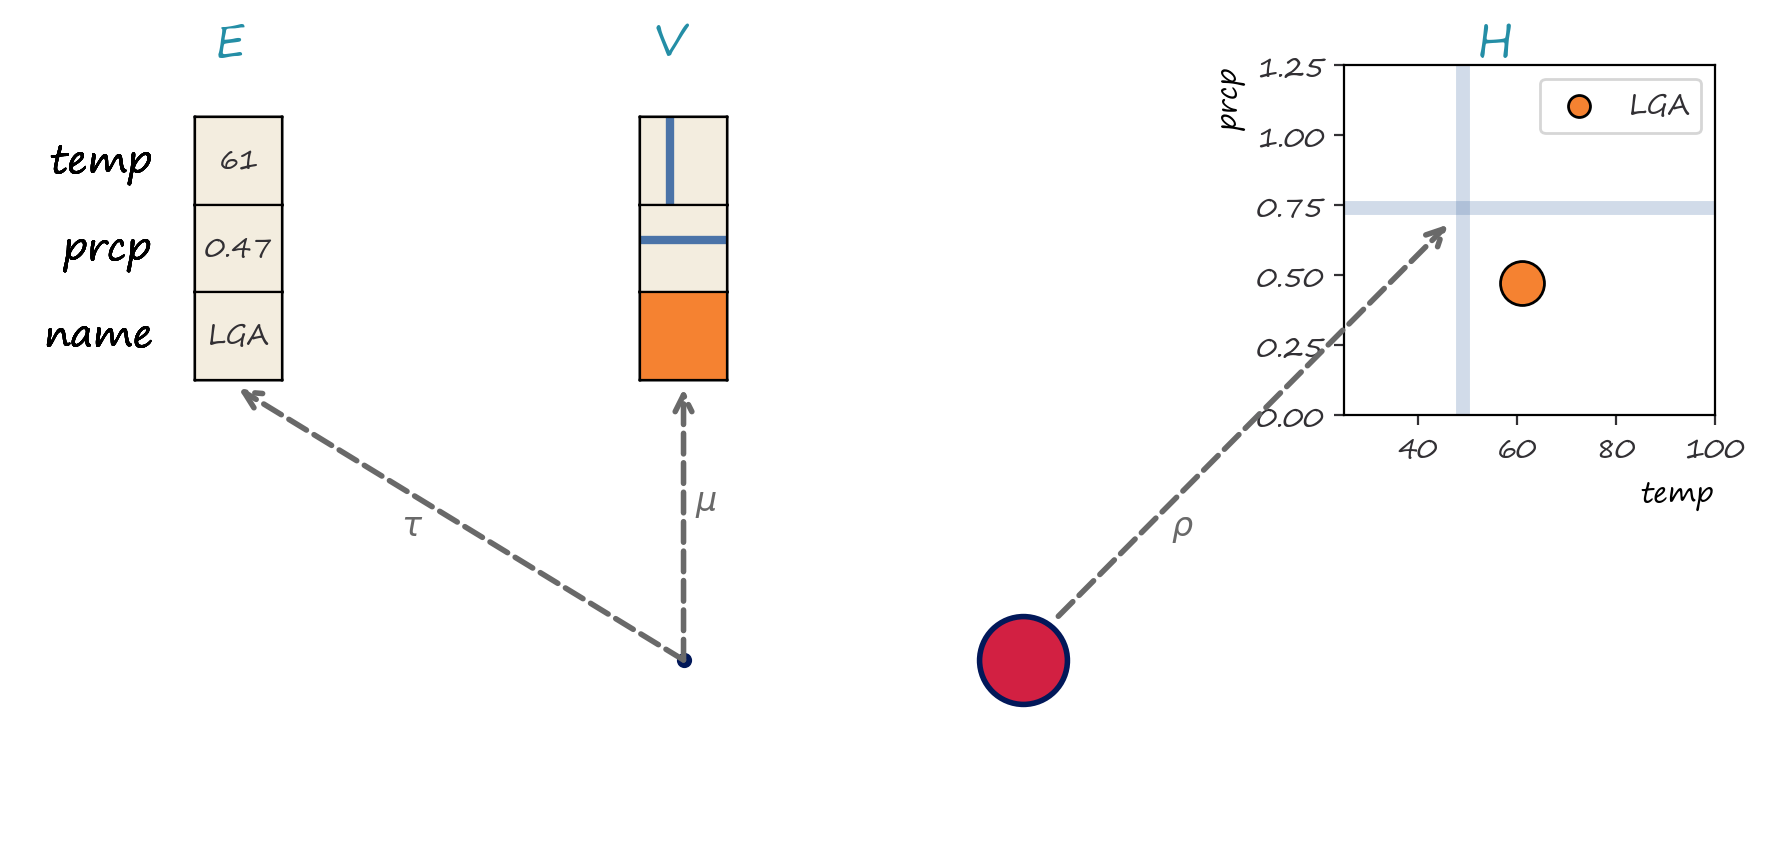

In [63]:
fig, axd = dg.make_figure(artist=False, section=True, 
                          visual=True, continuity=True, 
                          data=data, values=done,
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math04.png", facecolor='white', bbox_inches='tight')
plt.show()

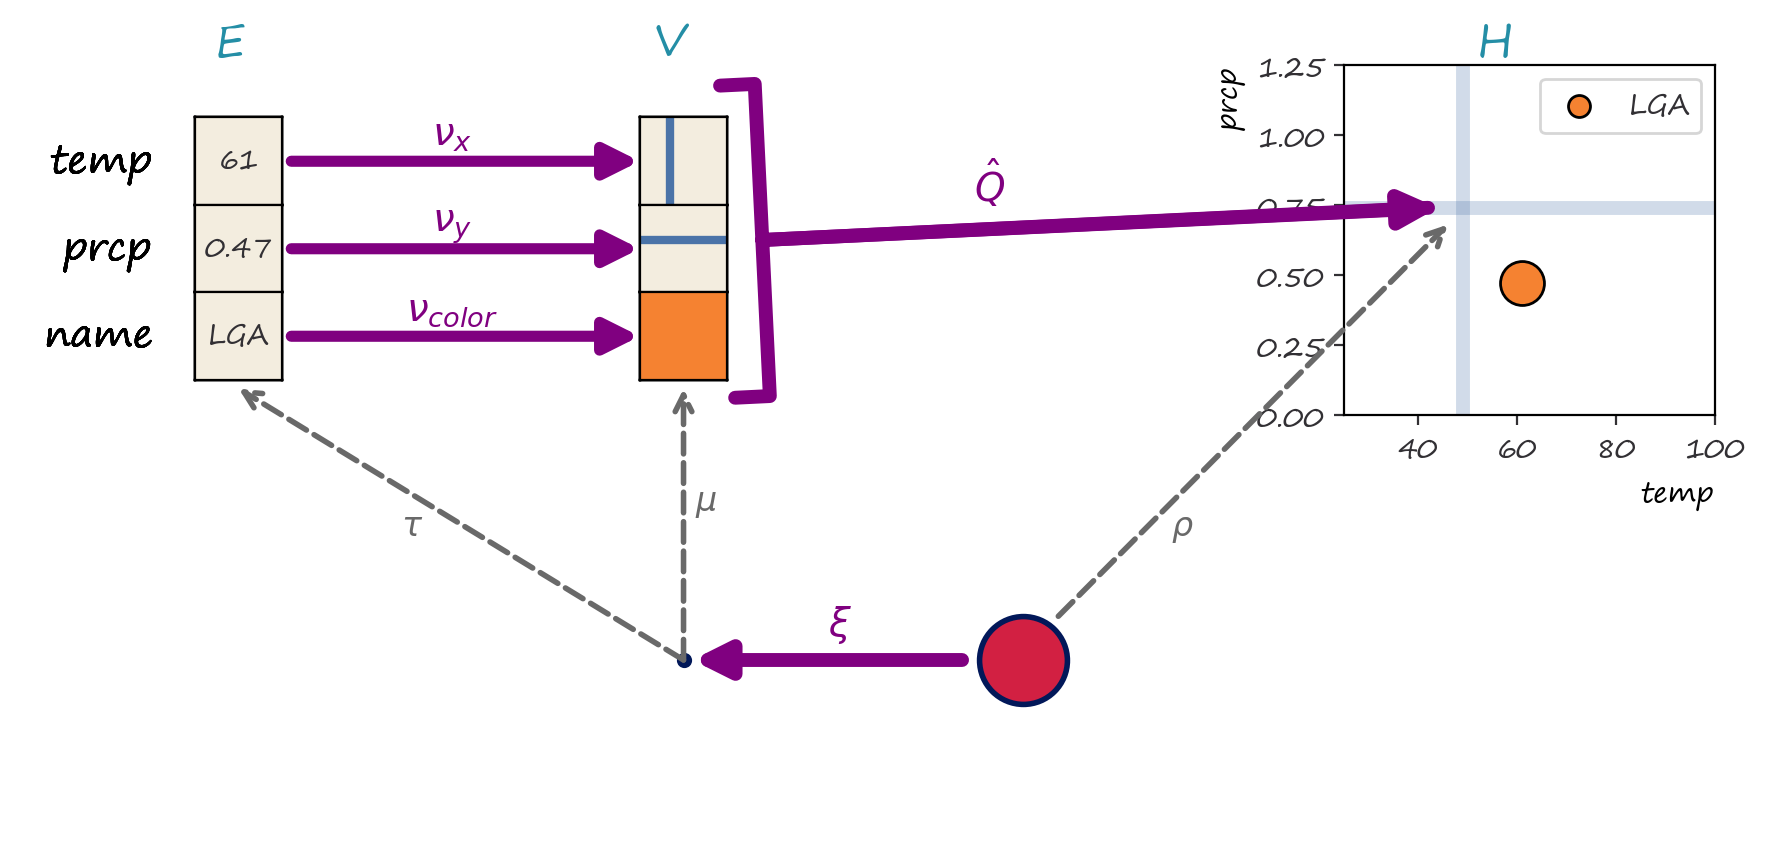

In [64]:
fig, axd = dg.make_figure(artist=True, section=True,
                          visual=True, continuity=True, 
                          data=True, values=done, 
                          label=['E', 'V', 'H'])
fig.savefig(spath/"math05.png", facecolor='white', bbox_inches='tight')
plt.show()

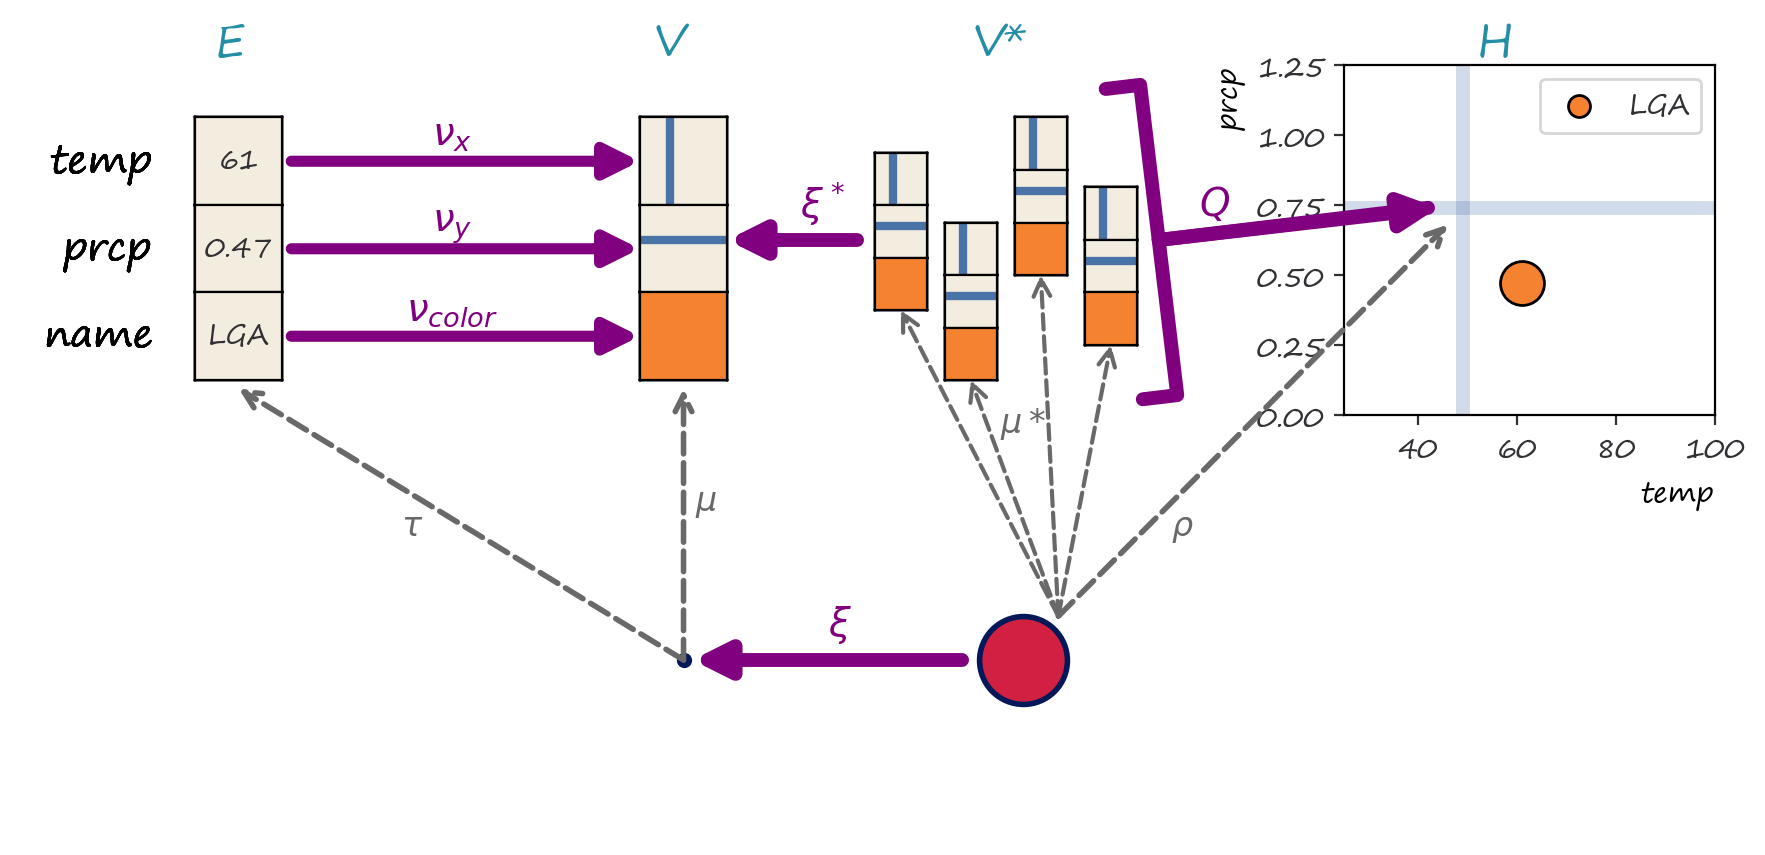

In [65]:
fig, axd = dg.make_figure(artist=True, section=True, 
                          visual=True, continuity=True, 
                          data=True, values=done,
                          label=['E', 'V', 'V*', 'H'])
fig.savefig(spath/"math06.png", facecolor='white', bbox_inches='tight')
plt.show()